# Soal Nomor 2
## Buatlah kode program dalam bahasa Python untuk mengekstrak pohon keputusan (decision tree)  dari  dataset  pilkada-1000-uas.csv  dan  lakukan  prediksi  terhadap  data  pilkada-100-uas.csv  menggunakan  decision  tree  yang  sudah  dibuat.  Aturlah  nilai  pada  parameter max_depth  dan  criterion  sampai  Anda  mendapatkan  akurasi  yang  paling  tinggi  pada prediksi dataset pilkada-100.csv (Anda bisa juga mengubah parameter lainnya).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dataset_path = 'pilkada-1000-uas.csv'
data = pd.read_csv(dataset_path)

atribut = data.drop('Hasil Pilkada', axis=1)
target = data['Hasil Pilkada']

# Mengubah data kategorikal menjadi one-hot encoding
atribut = pd.get_dummies(atribut)

# Menghapus kolom yang tidak diperlukan
kolom_yang_dihapus = ['Nama Daerah', 'Nama Kandidat (1)', 'Nama Kandidat (2)', 'Usia (1)', 'Usia (2)']
atribut = atribut.drop(columns=kolom_yang_dihapus, errors='ignore')

# Membagi dataset menjadi data latih dan data uji
atribut_latih, atribut_uji, target_latih, target_uji = train_test_split(atribut, target, test_size=0.2, random_state=42)

# Membuat model pohon keputusan
model_pohon_keputusan = DecisionTreeClassifier(random_state=42)
model_pohon_keputusan.fit(atribut_latih, target_latih)

# Menampilkan pohon keputusan sebagai teks
tree_rules = export_text(model_pohon_keputusan, feature_names=list(atribut.columns))
print("Pohon Keputusan:")
print(tree_rules)

# Melakukan prediksi terhadap data baru (pilkada-100-uas.csv)
dataset_path_new = 'pilkada-100-uas.csv'
data_new = pd.read_csv(dataset_path_new)

# Menentukan atribut dan target untuk data baru
atribut_new = data_new.drop('Hasil Pilkada', axis=1)
target_new = data_new['Hasil Pilkada']

# Mengubah data kategorikal menjadi one-hot encoding
atribut_new = pd.get_dummies(atribut_new)

# Menyaring hanya kolom yang ada di dataset pelatihan
kolom_atribut_latih = list(set(atribut_latih.columns) & set(atribut_new.columns))

# Menyaring hanya kolom yang ada di dataset pelatihan
atribut_new = atribut_new[kolom_atribut_latih]

# Menambahkan kolom-kolom yang mungkin tidak ada di dataset uji, tapi ada di dataset latih
kolom_tambahan = list(set(atribut_latih.columns) - set(atribut_new.columns))

# Menggunakan pd.concat untuk menambahkan kolom-kolom tambahan
if kolom_tambahan:
    atribut_new = pd.concat([atribut_new, pd.DataFrame(0, index=atribut_new.index, columns=kolom_tambahan)], axis=1)

# Menyusun kolom-kolom dalam urutan yang sesuai
atribut_new = atribut_new[atribut_latih.columns]

# Melakukan prediksi menggunakan model yang sudah dibuat
prediksi_hasil = model_pohon_keputusan.predict(atribut_new)

# Menghitung akurasi prediksi
akurasi_prediksi = accuracy_score(target_new, prediksi_hasil) * 100
print(f"Akurasi Prediksi Model: {akurasi_prediksi:.2f}%")


Pohon Keputusan:
|--- Jumlah Kursi Pendukung (DPRD) <= 0.63
|   |--- Jumlah Kursi Pendukung (DPRD) <= 0.27
|   |   |--- Jumlah Kursi Pendukung (DPR) <= 0.07
|   |   |   |--- Nama Kandidat (1)_Untung Tamsil <= 0.50
|   |   |   |   |--- Nama Kandidat (2)_Bonifasius Jakfu <= 0.50
|   |   |   |   |   |--- Nama Kandidat (1)_IRSAN EFENDI NASUTION, SH <= 0.50
|   |   |   |   |   |   |--- Nama Kandidat (1)_Hendrik Syake Mambor <= 0.50
|   |   |   |   |   |   |   |--- Nama Kandidat (2)_DRS. DEDIE A RACHIM, MA <= 0.50
|   |   |   |   |   |   |   |   |--- Nama Kandidat (1)_Faqih Jarjani <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Kalah
|   |   |   |   |   |   |   |   |--- Nama Kandidat (1)_Faqih Jarjani >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Menang
|   |   |   |   |   |   |   |--- Nama Kandidat (2)_DRS. DEDIE A RACHIM, MA >  0.50
|   |   |   |   |   |   |   |   |--- class: Menang
|   |   |   |   |   |   |--- Nama Kandidat (1)_Hendrik Syake Mambor >  0.50
|   |   |   |

# Soal Nomor 3
##  Catatlah  setiap  hasil  prediksi  yang  Anda  dapatkan  untuk  setiap  parameter  dalam  sebuah tabel lalu berikan analisis Anda terhadap hasil pengujian yang Anda peroleh! 

In [2]:
# Membuat daftar parameter untuk diuji
max_depth_values = [3, 5, 7, None]
criterion_values = ['gini', 'entropy']

# Membuat tabel untuk menyimpan hasil prediksi
hasil_prediksi_tabel = []

# Looping untuk setiap kombinasi parameter
for max_depth_val in max_depth_values:
    for criterion_val in criterion_values:
        # Membuat model pohon keputusan
        model_pohon_keputusan = DecisionTreeClassifier(max_depth=max_depth_val, criterion=criterion_val, random_state=42)
        model_pohon_keputusan.fit(atribut_latih, target_latih)

        # Melakukan prediksi terhadap data uji
        prediksi_hasil = model_pohon_keputusan.predict(atribut_uji)

        # Menghitung akurasi prediksi
        akurasi_prediksi = accuracy_score(target_uji, prediksi_hasil) * 100

        # Menyimpan hasil prediksi ke dalam tabel
        hasil_prediksi_tabel.append({'Max Depth': max_depth_val,
                                    'Criterion': criterion_val,
                                    'Akurasi Prediksi': akurasi_prediksi})

        # Menampilkan hasil analisis
        print(f"Max Depth: {max_depth_val}, Criterion: {criterion_val}, Akurasi Prediksi: {akurasi_prediksi:.2f}%")

# Membuat DataFrame dari list hasil_prediksi_tabel
hasil_prediksi_df = pd.DataFrame(hasil_prediksi_tabel)

# Menyimpan tabel hasil prediksi ke dalam file CSV
hasil_prediksi_df.to_csv('hasil_prediksi_tabel.csv', index=False)


Max Depth: 3, Criterion: gini, Akurasi Prediksi: 74.00%
Max Depth: 3, Criterion: entropy, Akurasi Prediksi: 74.00%
Max Depth: 5, Criterion: gini, Akurasi Prediksi: 72.00%
Max Depth: 5, Criterion: entropy, Akurasi Prediksi: 71.00%
Max Depth: 7, Criterion: gini, Akurasi Prediksi: 70.00%
Max Depth: 7, Criterion: entropy, Akurasi Prediksi: 72.50%
Max Depth: None, Criterion: gini, Akurasi Prediksi: 67.00%
Max Depth: None, Criterion: entropy, Akurasi Prediksi: 70.00%


# Soal nomor 4
## Tampilkan visualisasi pohon keputusan yang telah berhasil dibangun!

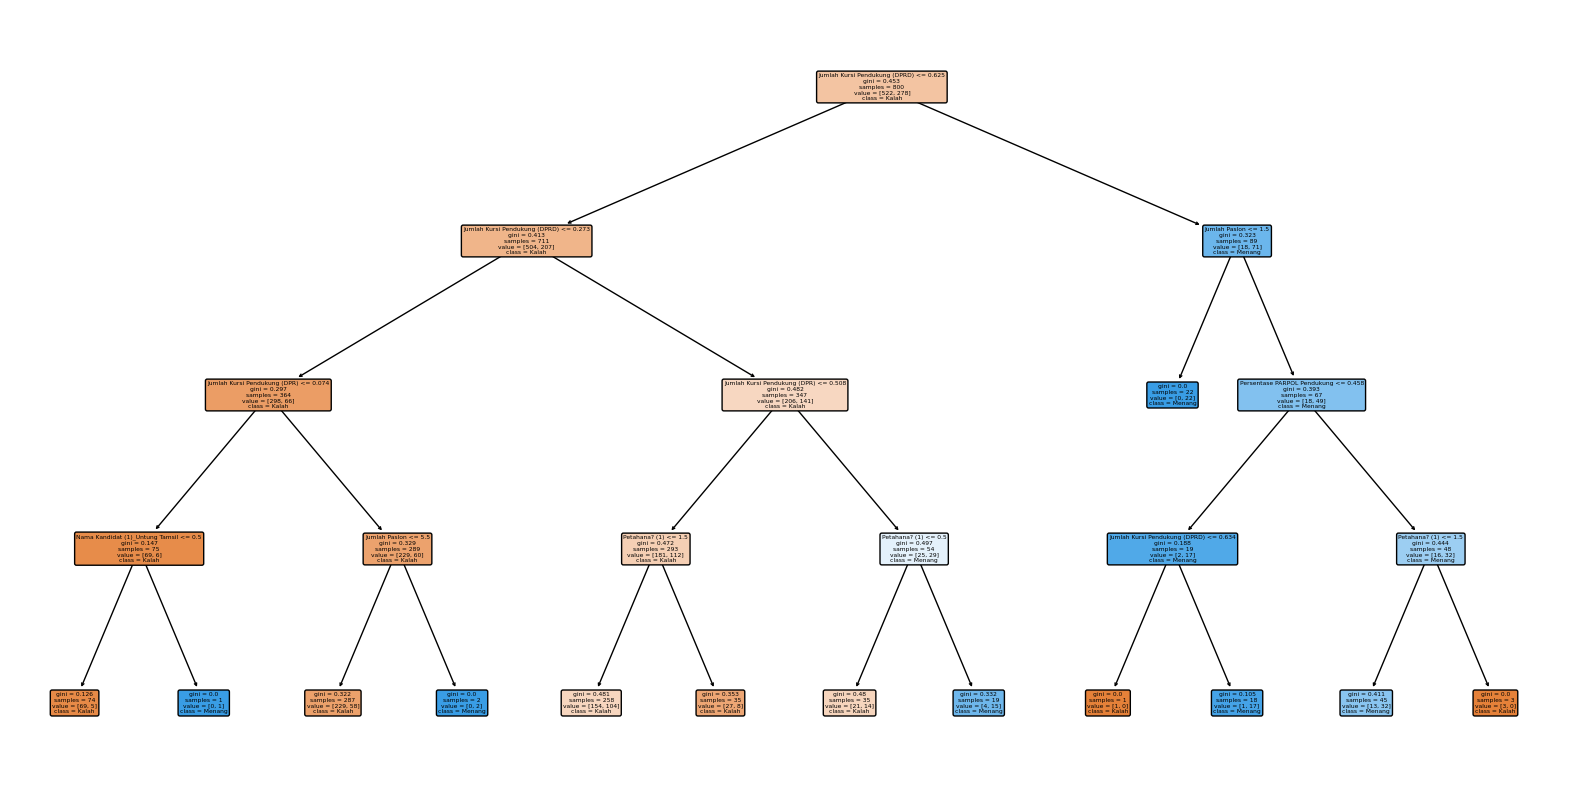

In [3]:
model_pohon_keputusan = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
model_pohon_keputusan.fit(atribut_latih, target_latih)

plt.figure(figsize=(20, 10))
plot_tree(model_pohon_keputusan, feature_names=atribut.columns, class_names=model_pohon_keputusan.classes_, filled=True, rounded=True)
plt.show()